In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sanjuan_dataset = pd.read_csv("../../dengueData/SanJuan/san_juan_training_data.csv")
print(sanjuan_dataset.head())
print("Number of observations: ", len(sanjuan_dataset))

      season  season_week week_start_date  denv1_cases  denv2_cases  \
0  1990/1991            1      1990-04-30            0            0   
1  1990/1991            2      1990-05-07            0            0   
2  1990/1991            3      1990-05-14            0            0   
3  1990/1991            4      1990-05-21            0            0   
4  1990/1991            5      1990-05-28            0            0   

   denv3_cases  denv4_cases  other_positive_cases  additional_cases  \
0            0            0                     4                 0   
1            0            0                     5                 0   
2            0            0                     4                 0   
3            0            0                     3                 0   
4            0            0                     6                 0   

   total_cases  
0            4  
1            5  
2            4  
3            3  
4            6  
Number of observations:  988


In [3]:
sanjuan_cases = sanjuan_dataset["total_cases"].values
print(sanjuan_cases.shape)

(988,)


In [4]:
split_index = int(len(sanjuan_cases)* 0.7)
window_size = 4
future_steps = 2
train = sanjuan_cases[:split_index+window_size]

#Test goes from train to end - future_steps (as this data will be feed into the model)
#Expected is always future_steps ahead of test as this is the expected predictions
test = sanjuan_cases[split_index+window_size:-future_steps]
expected = sanjuan_cases[split_index+window_size+future_steps:]

print(train.shape)
print(test.shape)
print(expected.shape)

(695,)
(291,)
(291,)


E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out = out_full[ind]
E:\Aplicaciones\Anaconda3\envs\ML\lib\site-packages\scipy\signal\signaltools.py:1350: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this wil

predicted=25.420145, expected=37.000000
predicted=38.318313, expected=41.000000
predicted=27.731275, expected=34.000000
predicted=38.188087, expected=30.000000
predicted=43.876781, expected=39.000000
predicted=33.058673, expected=39.000000
predicted=29.982681, expected=39.000000
predicted=41.369617, expected=34.000000
predicted=38.714507, expected=30.000000
predicted=38.835231, expected=37.000000
predicted=34.416983, expected=29.000000
predicted=29.067603, expected=26.000000
predicted=37.752034, expected=15.000000
predicted=26.668863, expected=22.000000
predicted=23.991452, expected=15.000000
predicted=12.332191, expected=20.000000
predicted=20.891310, expected=14.000000
predicted=12.036198, expected=10.000000
predicted=18.725497, expected=21.000000
predicted=13.221971, expected=14.000000
predicted=7.894603, expected=14.000000
predicted=23.054726, expected=9.000000
predicted=12.505704, expected=11.000000
predicted=13.125588, expected=5.000000
predicted=9.015535, expected=6.000000
predi

predicted=71.769137, expected=101.000000
predicted=120.497414, expected=170.000000
predicted=111.645780, expected=135.000000
predicted=101.437183, expected=106.000000
predicted=189.600915, expected=68.000000
predicted=140.590686, expected=48.000000
predicted=102.848950, expected=48.000000
predicted=62.844043, expected=26.000000
predicted=36.666786, expected=33.000000
predicted=33.913306, expected=29.000000
predicted=10.156750, expected=17.000000
predicted=25.179608, expected=12.000000
predicted=24.819125, expected=13.000000
predicted=11.327342, expected=17.000000
predicted=7.815934, expected=15.000000
predicted=11.277531, expected=14.000000
predicted=15.324714, expected=15.000000
predicted=13.356968, expected=10.000000
predicted=13.667827, expected=9.000000
predicted=15.582197, expected=2.000000
predicted=8.999237, expected=6.000000
predicted=7.897801, expected=8.000000
predicted=-0.206854, expected=5.000000
predicted=5.192084, expected=1.000000
predicted=7.581840, expected=2.000000
pr

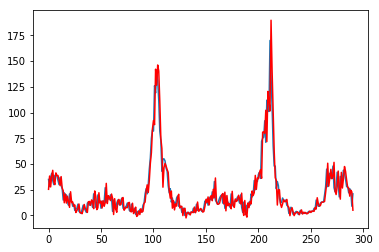

In [5]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast(steps=4) #future_steps+1
    yhat = output[0][future_steps]
    
    predictions.append(yhat)
    obs = expected[t]
    history.append(test[t])
    print('predicted=%f, expected=%f' % (yhat, obs))
    
error = mean_squared_error(expected, predictions)
print('Test MSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

In [6]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(expected, predictions)
print(mae)

9.198619992984447


In [7]:
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + np.finfo(float).eps))) * 100

mape = mean_absolute_percentage_error(expected, predictions)
print(mape)

156503413972798.06
